# Arctic Project: Future Predict in Random Forest

## Load libraries

In [1]:
library(MASS)
library(tidyverse)
library(randomForest)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)
future_data <- read.csv("future_dataset.csv",stringsAsFactors = F)
visulization_data <- read.csv("visulization.csv",stringsAsFactors = F)
tool <- read.csv("tool.csv",stringsAsFactors = F)

In [3]:
model <- randomForest(Extent~Rainfall+Daylight+Population+CO2+Ozone
                              +OceanTemperature_NorthernHemisphere
                              +LandTemperature_NorthernHemisphere
                              +MinTemperature_NorthSlopeAlaska
                              +GDP_WORLD,
                              data=arctic, mtry=5, ntree=200)

In [4]:
pred <- cbind(tool,as.data.frame(predict(model,future_data)))

In [5]:
pred["prediction"] <- (pred$predict*(13.9-2.41)+2.41)

In [6]:
result <- left_join(visulization_data, pred, by="observation")
result

observation,Extent,"predict(model, future_data)",prediction
<int>,<dbl>,<dbl>,<dbl>
1,13.73624,NA,NA
2,14.57508,NA,NA
3,15.13848,NA,NA
4,14.66272,NA,NA
5,12.87236,NA,NA
6,10.59372,NA,NA
7,8.06468,NA,NA
8,5.87368,NA,NA
9,4.87208,NA,NA


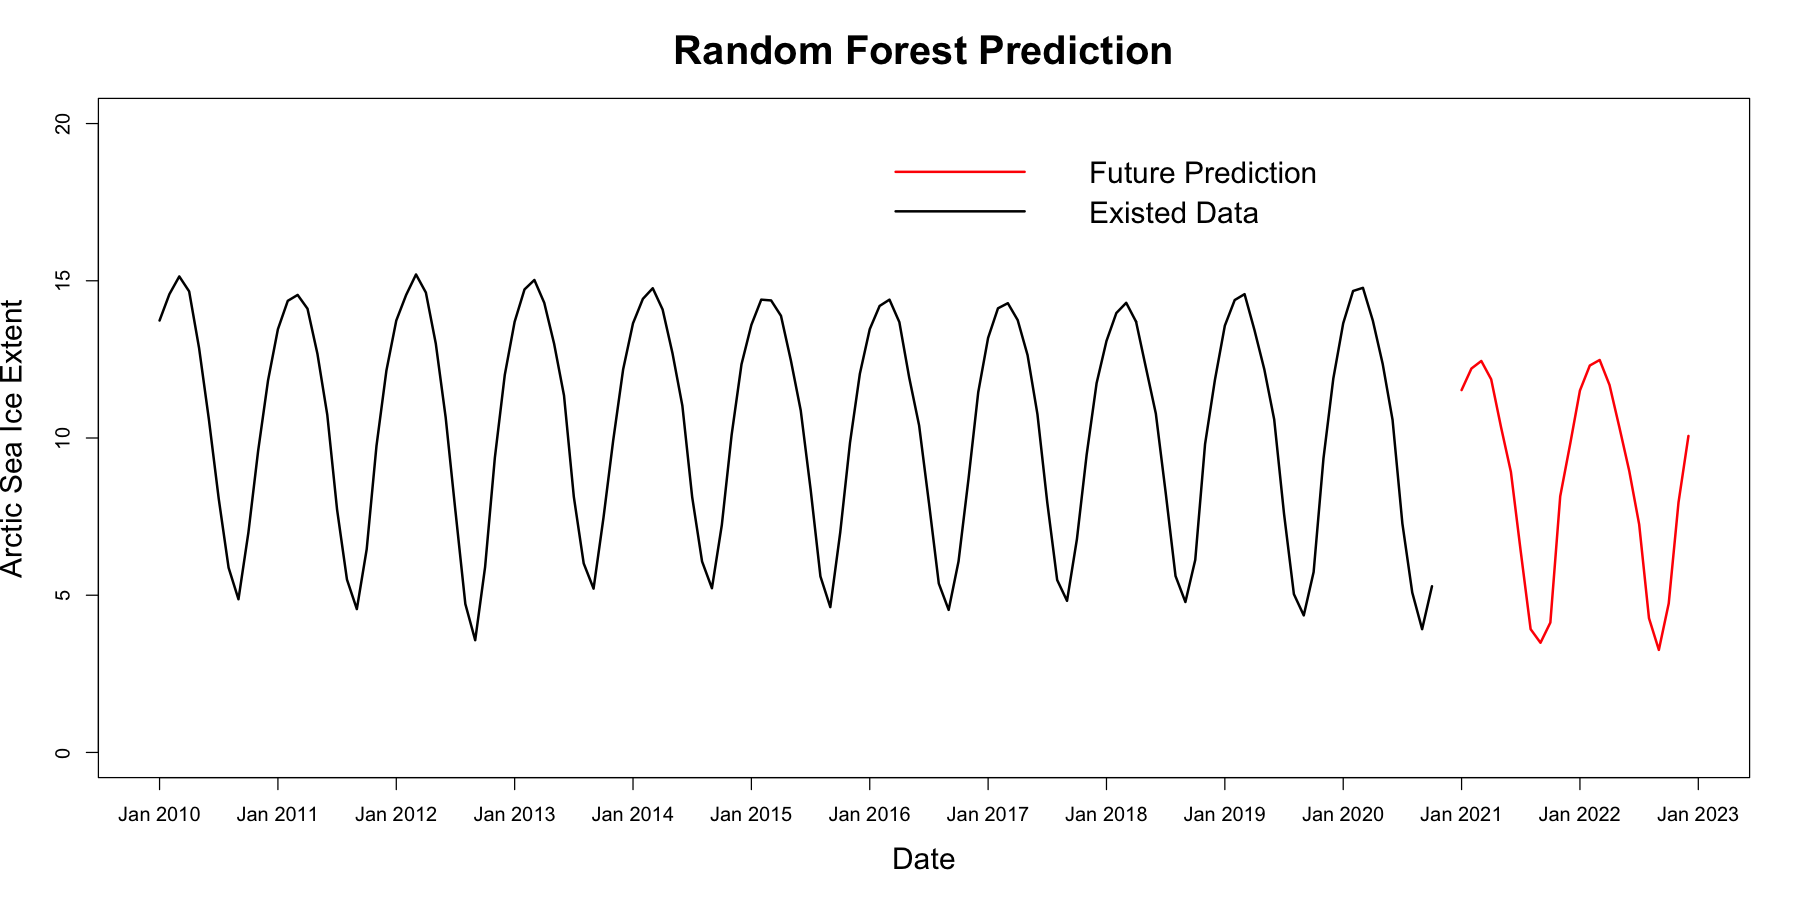

In [7]:
# figure size
options(repr.plot.width=15, repr.plot.height=7.5)

# plot
plot(result$observation,result$Extent,type ='l',ylim = c(0,20),lwd = '2',
     xlab = "Date", ylab = "Arctic Sea Ice Extent",xaxt='n',cex.lab = 1.5)

# attributes of prediction lines
lines(result$observation,result$prediction,lty=1,col='red',lwd = '2')

# x-axis labels
axis(1,at=c(1,13,25,37,49,61,73,85,97,109,121,133,145,157),
   labels=c("Jan 2010","Jan 2011","Jan 2012","Jan 2013","Jan 2014","Jan 2015","Jan 2016","Jan 2017","Jan 2018","Jan 2019","Jan 2020","Jan 2021","Jan 2022","Jan 2023"))

# title
title(main = list("Random Forest Prediction", cex = 2, col = "black", font = 2))

# legend
legend("topright",inset=.05,c("Future Prediction","Existed Data"),
       bty = 'n',lty=c(1, 1),col=c("red", "black"),lwd =c(2, 2),cex = 1.5)